In [13]:
!pip install scikit-learn==1.5

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import os
os.makedirs('./models', exist_ok=True)

In [15]:
print(sklearn.__version__)

1.5.0


In [16]:
import sys
print(sys.executable)

C:\Users\dhallj\AppData\Local\anaconda3\python.exe


In [17]:
df = pd.read_csv(r'C:\Users\dhallj\Downloads\underwriter_input_data.csv')
df

,Age,Gender,Occupation,Location,Income Level,Coverage Type,Coverage Amount,Deductible,Policy Term,Additional Riders,Medical History,Lifestyle Factors,Driving History,Claims History,Premium Amount
0,34,Male,Lawyer,New York,81570.18,Life,161189.70,1474.18,14,NaN,Heart Disease,Non-smoker,No accidents,4,120.89
1,64,Female,Teacher,Florida,57181.11,Home,315934.11,1229.96,24,Accidental Death,Heart Disease,Regular Drinker,2 accidents,5,284.34
2,39,Non-binary,Lawyer,Illinois,81949.27,Health,294925.75,2040.21,13,NaN,Diabetes,Smoker,Multiple accidents,2,287.55
3,36,Male,Doctor,California,102461.15,Home,100722.70,517.20,1,Accidental Death,Hypertension,Non-smoker,Multiple accidents,3,75.54
4,67,Non-binary,Engineer,Texas,88250.07,Auto,373983.12,4270.60,4,Accidental Death,NaN,Regular Drinker,No accidents,0,224.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,55,Non-binary,Doctor,Texas,107229.63,Life,486194.14,1882.13,10,NaN,Heart Disease,Non-smoker,No accidents,3,437.57
4996,54,Female,Teacher,Florida,92912.67,Health,322285.08,3345.78,8,NaN,NaN,Non-smoker,1 accident,5,193.37
4997,39,Non-binary,Doctor,California,135055.65,Life,352048.56,938.71,18,Critical Illness,Heart Disease,Occasional Drinker,No accidents,0,264.04
4998,58,Non-binary,Lawyer,New York,107804.88,Life,258153.02,1698.14,10,Critical Illness,Heart Disease,Regular Drinker,Multiple accidents,1,232.34


In [18]:
# Preprocess the Data
X = df.drop(columns=['Premium Amount'])
y = df['Premium Amount']

In [19]:
# Identify categorical columns and numeric columns
categorical_cols = ['Gender', 'Occupation', 'Location', 'Coverage Type', 
                    'Additional Riders', 'Medical History', 'Lifestyle Factors', 'Driving History']
numeric_cols = ['Age', 'Income Level', 'Coverage Amount', 'Deductible', 'Policy Term', 'Claims History']

In [20]:
# One-Hot Encode categorical variables
encoder = OneHotEncoder(drop= None, sparse_output=False,handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

In [21]:
X_encoded

,Gender_Female,Gender_Male,Gender_Non-binary,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Teacher,Location_California,Location_Florida,...,Medical History_Hypertension,Medical History_nan,Lifestyle Factors_Non-smoker,Lifestyle Factors_Occasional Drinker,Lifestyle Factors_Regular Drinker,Lifestyle Factors_Smoker,Driving History_1 accident,Driving History_2 accidents,Driving History_Multiple accidents,Driving History_No accidents
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4997,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4998,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Standardize numeric variables
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_cols]), columns=numeric_cols)
X_scaled

,Age,Income Level,Coverage Amount,Deductible,Policy Term,Claims History
0,-0.752867,-0.240987,-0.686139,-0.987594,-0.176485,0.866816
1,1.039360,-0.950007,0.427148,-1.178063,0.967736,1.453931
2,-0.454162,-0.229966,0.276006,-0.546142,-0.290907,-0.307413
3,-0.633385,0.366339,-1.121160,-1.733951,-1.663971,0.279701
4,1.218583,-0.046795,0.844774,1.193359,-1.320705,-1.481643
...,...,...,...,...,...,...
4995,0.501692,0.504964,1.652060,-0.669430,-0.634173,0.279701
4996,0.441951,0.088753,0.472839,0.472083,-0.863017,1.453931
4997,-0.454162,1.313901,0.686968,-1.405212,0.281204,-1.481643
4998,0.680915,0.521688,0.011450,-0.812926,-0.634173,-0.894528


In [23]:
# with open('./models/scaler.pkl', 'wb') as scaler_file:
#     pickle.dump(scaler, scaler_file)

In [24]:
X_encoded.columns

Index(['Gender_Female', 'Gender_Male', 'Gender_Non-binary',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Teacher', 'Location_California',
       'Location_Florida', 'Location_Illinois', 'Location_New York',
       'Location_Texas', 'Coverage Type_Auto', 'Coverage Type_Health',
       'Coverage Type_Home', 'Coverage Type_Life',
       'Additional Riders_Accidental Death',
       'Additional Riders_Critical Illness', 'Additional Riders_nan',
       'Medical History_Diabetes', 'Medical History_Heart Disease',
       'Medical History_Hypertension', 'Medical History_nan',
       'Lifestyle Factors_Non-smoker', 'Lifestyle Factors_Occasional Drinker',
       'Lifestyle Factors_Regular Drinker', 'Lifestyle Factors_Smoker',
       'Driving History_1 accident', 'Driving History_2 accidents',
       'Driving History_Multiple accidents', 'Driving History_No accidents'],
      dtype='object')

In [25]:
# Combine encoded categorical and scaled numeric data
#X_preprocessed = pd.concat([X_encoded.reset_index(drop=True), X_scaled.reset_index(drop=True)], axis=1)
X_preprocessed = pd.concat([X_encoded, X_scaled], axis=1)

In [26]:
X_preprocessed

,Gender_Female,Gender_Male,Gender_Non-binary,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Teacher,Location_California,Location_Florida,...,Driving History_1 accident,Driving History_2 accidents,Driving History_Multiple accidents,Driving History_No accidents,Age,Income Level,Coverage Amount,Deductible,Policy Term,Claims History
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.752867,-0.240987,-0.686139,-0.987594,-0.176485,0.866816
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.039360,-0.950007,0.427148,-1.178063,0.967736,1.453931
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.454162,-0.229966,0.276006,-0.546142,-0.290907,-0.307413
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,-0.633385,0.366339,-1.121160,-1.733951,-1.663971,0.279701
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.218583,-0.046795,0.844774,1.193359,-1.320705,-1.481643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.501692,0.504964,1.652060,-0.669430,-0.634173,0.279701
4996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.441951,0.088753,0.472839,0.472083,-0.863017,1.453931
4997,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,-0.454162,1.313901,0.686968,-1.405212,0.281204,-1.481643
4998,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.680915,0.521688,0.011450,-0.812926,-0.634173,-0.894528


In [27]:
with open('./models/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('./models/encoder.pkl', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)

In [28]:
# Print columns to debug
print("Training Data Columns:", X_preprocessed.columns.tolist())


Training Data Columns: ['Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Teacher', 'Location_California', 'Location_Florida', 'Location_Illinois', 'Location_New York', 'Location_Texas', 'Coverage Type_Auto', 'Coverage Type_Health', 'Coverage Type_Home', 'Coverage Type_Life', 'Additional Riders_Accidental Death', 'Additional Riders_Critical Illness', 'Additional Riders_nan', 'Medical History_Diabetes', 'Medical History_Heart Disease', 'Medical History_Hypertension', 'Medical History_nan', 'Lifestyle Factors_Non-smoker', 'Lifestyle Factors_Occasional Drinker', 'Lifestyle Factors_Regular Drinker', 'Lifestyle Factors_Smoker', 'Driving History_1 accident', 'Driving History_2 accidents', 'Driving History_Multiple accidents', 'Driving History_No accidents', 'Age', 'Income Level', 'Coverage Amount', 'Deductible', 'Policy Term', 'Claims History']


In [29]:
# Save the column names to a file
X_preprocessed_columns = X_preprocessed.columns
with open('./models/columns.pkl', 'wb') as columns_file:
    pickle.dump(X_preprocessed_columns, columns_file)

In [30]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [31]:
print(f"Expected features: {X_train.shape[1]}")

Expected features: 38


# Train a model with Linear Regressor

In [33]:
# Train a Model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# # Evaluate the Model
y_pred_train = model.predict(X_train)
y_pred_test_1 = model.predict(X_test)

In [84]:
# # Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test_1)

# # Calculate R² (Coefficient of Determination)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test_1)

print(f"LR Train MSE: {train_mse}")
print(f"LR Test MSE: {test_mse}")

print(f"LR Train R-squared: {train_r2}")
print(f"LR Test R-squared: {test_r2}")

LR Train MSE: 723.7906153821973
LR Test MSE: 713.9178929522461
LR Train R-squared: 0.9530089310169965
LR Test R-squared: 0.9526725384048478


### Train a model with Random forest Regressor

In [37]:

#Initialization
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test_2 = rf_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test_2)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test_2)

print(f"Random Forest Train MSE: {train_mse}")
print(f"Random Forest Test MSE: {test_mse}")
print(f"Random Forest Train R²: {train_r2}")
print(f"Random Forest Test R²: {test_r2}")

Random Forest Train MSE: 0.7361303878125041
Random Forest Test MSE: 2.3695750083600005
Random Forest Train R²: 0.9999522077889669
Random Forest Test R²: 0.9998429147506848


### Train a model with Ridge Regressor

In [39]:


# # Initialize the Ridge Regressor
ridge_model = Ridge(alpha=1.0)

# # Train the model
ridge_model.fit(X_train, y_train)

# # Make predictions
y_pred_train = ridge_model.predict(X_train)
y_pred_test_3 = ridge_model.predict(X_test)

# # Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test_3)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test_3)

print(f"Ridge Train MSE: {train_mse}")
print(f"Ridge Test MSE: {test_mse}")
print(f"Ridge Train R²: {train_r2}")
print(f"Ridge Test R²: {test_r2}")

Ridge Train MSE: 723.7906153821973
Ridge Test MSE: 713.7498436088703
Ridge Train R²: 0.9530089310169965
Ridge Test R²: 0.9526836788299908


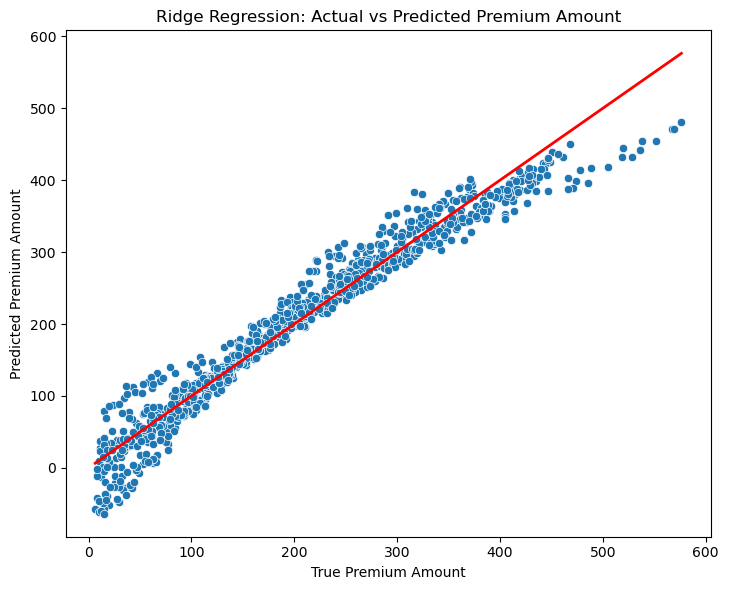

In [40]:
# # Ridge plot
# #Plot 'Actual vs Predicted Premium Amount' for Ridge
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test_3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Ridge Regression: Actual vs Predicted Premium Amount')
plt.xlabel('True Premium Amount')
plt.ylabel('Predicted Premium Amount')
plt.tight_layout()
plt.show()

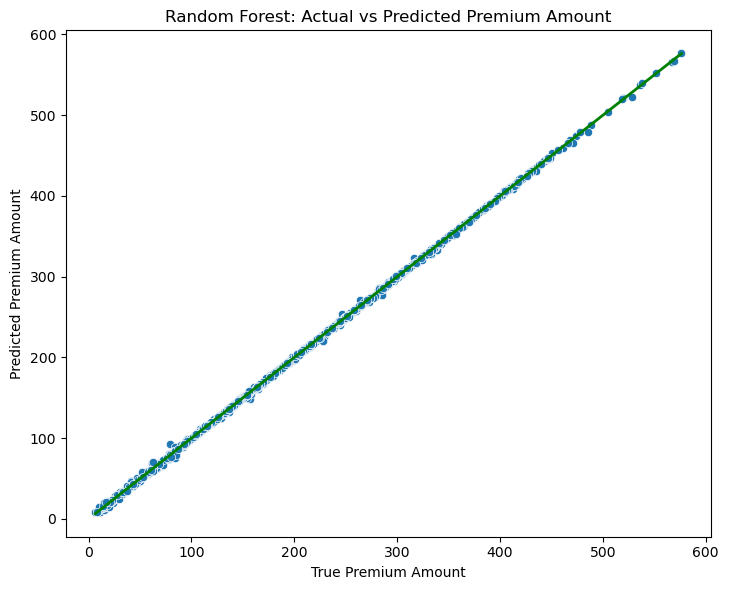

In [41]:
# Random Forest plot
# Plot 'Actual vs Predicted Premium Amount' for Random Forest
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test_2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', lw=2)
plt.title('Random Forest: Actual vs Predicted Premium Amount')
plt.xlabel('True Premium Amount')
plt.ylabel('Predicted Premium Amount')
plt.tight_layout()
plt.show()

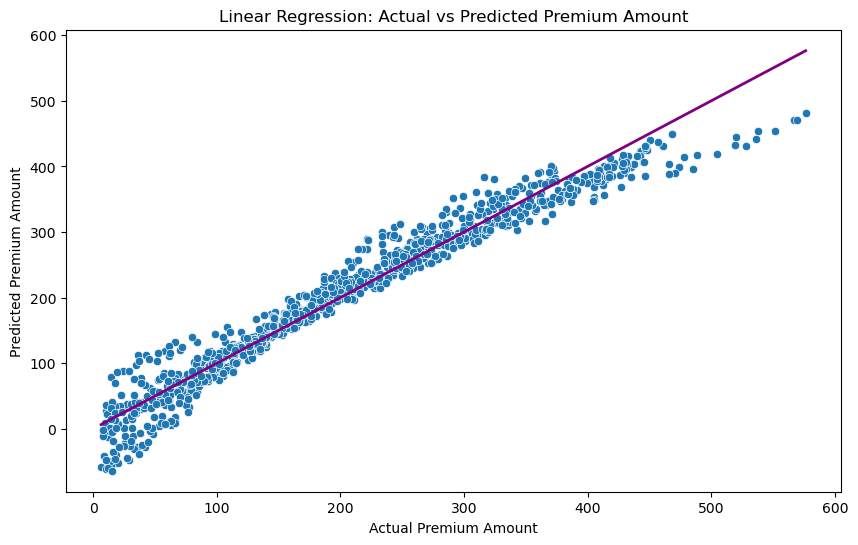

In [42]:
# # Visualize the Results
# #Plot the actual vs predicted premium amounts on the test set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='purple', lw=2)
plt.xlabel('Actual Premium Amount')
plt.ylabel('Predicted Premium Amount')
plt.title('Linear Regression: Actual vs Predicted Premium Amount')
plt.show()

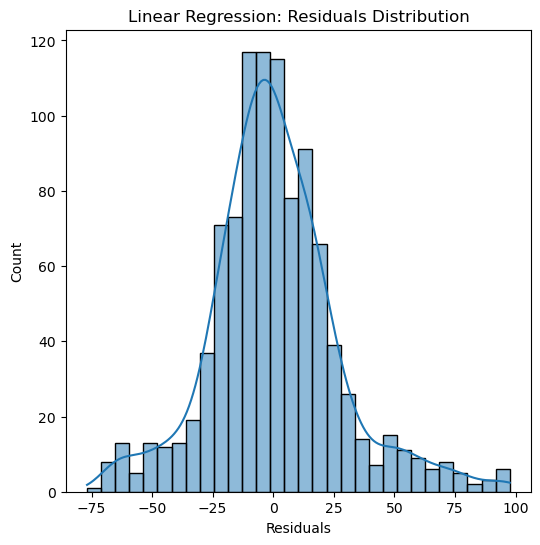

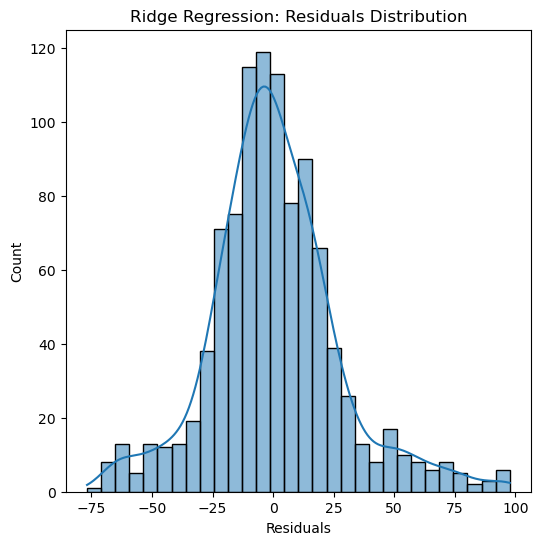

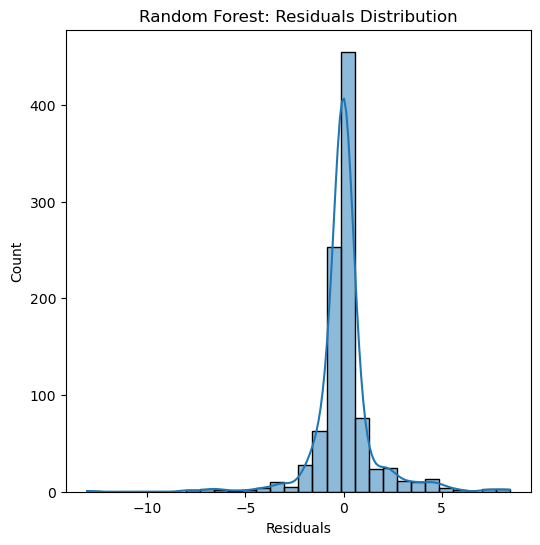

In [43]:
# Residuals for Linear Regression
residuals_linear = y_test - y_pred_test_1
plt.figure(figsize=(6, 6))
sns.histplot(residuals_linear, kde=True, bins=30)
plt.title('Linear Regression: Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

# # Residuals for Ridge Regression
residuals_ridge = y_test - y_pred_test_3
plt.figure(figsize=(6, 6))
sns.histplot(residuals_ridge, kde=True, bins=30)
plt.title('Ridge Regression: Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

# # Residuals for Random Forest
residuals_rf = y_test - y_pred_test_2
plt.figure(figsize=(6, 6))
sns.histplot(residuals_rf, kde=True, bins=30)
plt.title('Random Forest: Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

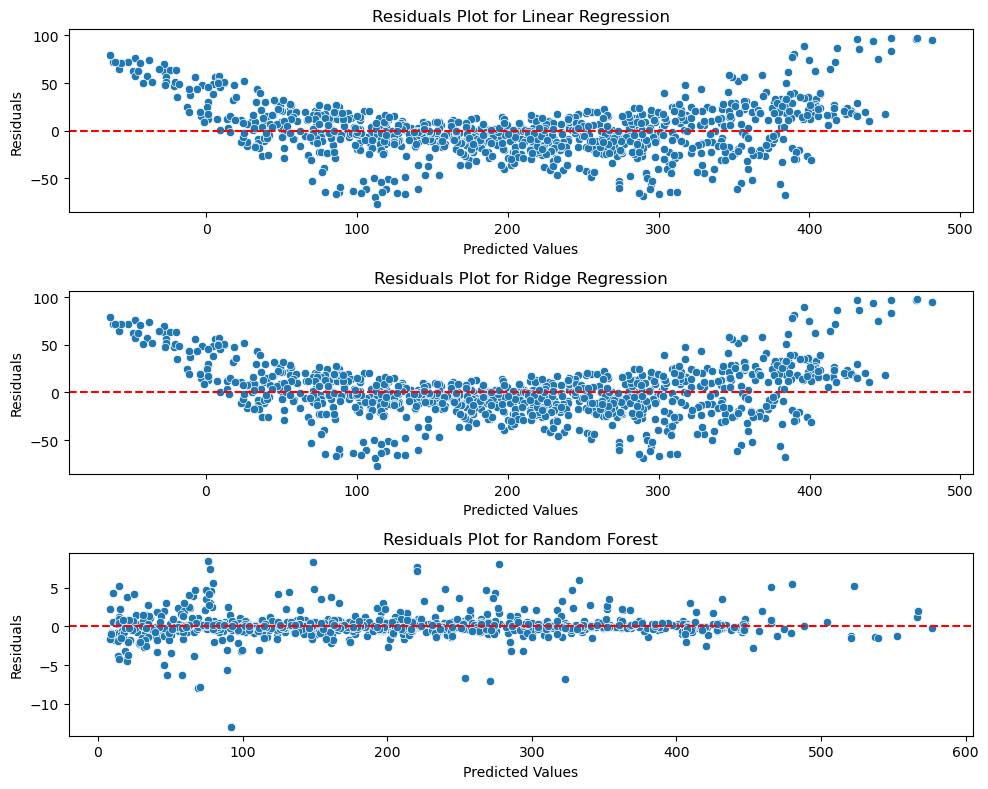

In [86]:


models_predictions = {
    'Linear Regression': y_pred_test_1,
    'Ridge Regression': y_pred_test_3,
    'Random Forest': y_pred_test_2
}

plt.figure(figsize=(10, 8))

for i, (name, preds) in enumerate(models_predictions.items(), 1):
    plt.subplot(3, 1, i)  # Create subplots for each model
    residuals = y_test - preds
    sns.scatterplot(x=preds, y=residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.title(f'Residuals Plot for {name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [45]:
models = ['Linear Regression', 'Ridge Regression', 'Random Forest']


r2_scores = [0.9525211385918675, 0.9525511387127599, 0.99982993553537]  # Add your R² values here


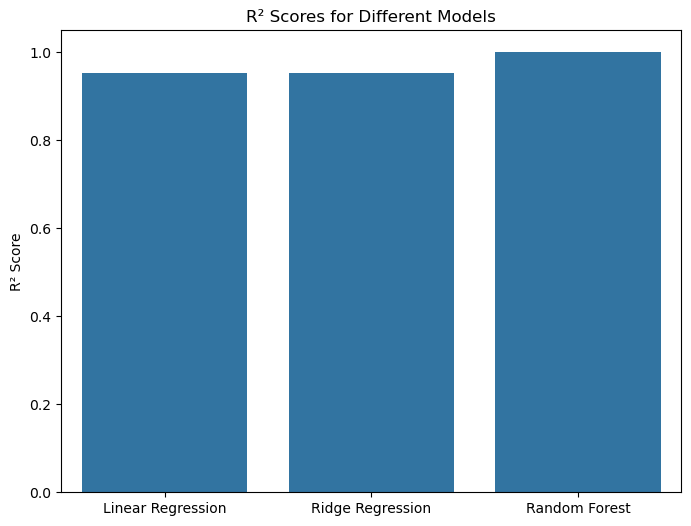

<Figure size 640x480 with 0 Axes>

In [46]:
# Bar Chart of R² Scores for all models
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=r2_scores)
plt.title('R² Scores for Different Models')
plt.ylabel('R² Score')
plt.show()
plt.savefig('R_Square.png')

In [47]:
#  Pickle the Model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    
print("Model has been pickled as 'linear_regression_model.pkl'")

Model has been pickled as 'linear_regression_model.pkl'


In [48]:
with open('rf_regression_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
    
print("Model has been pickled as 'rf_model.pkl'")

Model has been pickled as 'rf_model.pkl'
